In [79]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [80]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train'
valid_path = '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation'


In [83]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [85]:
for layer in resnet.layers:
    layer.trainable = False

In [86]:
folders = glob('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/*')

In [87]:
x = Flatten()(resnet.output)

In [88]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [89]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [90]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [92]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1385 images belonging to 4 classes.


In [93]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 492 images belonging to 4 classes.


In [94]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
44/44 [==============================] - 521s 12s/step - loss: 5.2095 - accuracy: 0.2983 - val_loss: 1.6613 - val_accuracy: 0.3293
Epoch 2/15
44/44 [==============================] - 493s 11s/step - loss: 1.9158 - accuracy: 0.2924 - val_loss: 1.4917 - val_accuracy: 0.2988
Epoch 3/15
44/44 [==============================] - 493s 11s/step - loss: 1.5494 - accuracy: 0.3154 - val_loss: 2.4920 - val_accuracy: 0.2520
Epoch 4/15
44/44 [==============================] - 496s 11s/step - loss: 1.7616 - accuracy: 0.3085 - val_loss: 2.7271 - val_accuracy: 0.2500
Epoch 5/15
44/44 [==============================] - 483s 11s/step - loss: 1.9008 - accuracy: 0.3273 - val_loss: 1.6683 - val_accuracy: 0.3557
Epoch 6/15
44/44 [==============================] - 495s 11s/step - loss: 1.5702 - accuracy: 0.3601 - val_loss: 1.8297 - val_accuracy: 0.2866
Epoch 7/15
44/44 [==============================] - 505s 11s/step - loss: 1.5668 - accuracy: 0.3559 - val_loss: 2.0833 - val_accuracy: 0.2764
Epoch 

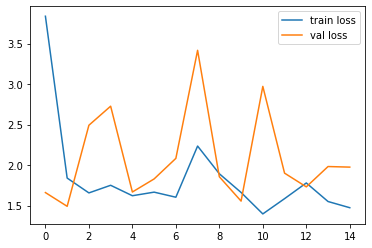

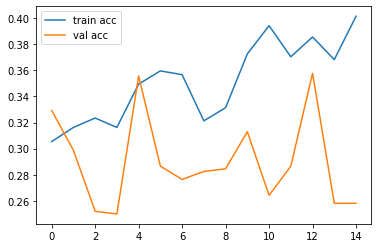

<Figure size 432x288 with 0 Axes>

In [95]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [96]:
from tensorflow.keras.models import load_model

model.save('ricemodel_resnet.h5')

In [97]:
y_pred = model.predict(test_set)

In [98]:
y_pred

array([[1.4467885e-02, 8.0569160e-01, 1.6776776e-01, 1.2072823e-02],
       [2.3434944e-03, 8.4867704e-01, 1.4680664e-01, 2.1728450e-03],
       [6.0383235e-03, 5.2367693e-01, 4.0229243e-01, 6.7992263e-02],
       ...,
       [6.6565191e-03, 5.3332305e-01, 3.7805536e-01, 8.1964985e-02],
       [4.9186917e-04, 2.7895814e-01, 7.1877629e-01, 1.7736859e-03],
       [1.6372791e-01, 3.9852092e-01, 2.7401358e-01, 1.6373758e-01]],
      dtype=float32)

In [99]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [100]:
y_pred

array([1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 2, 1,

In [101]:
img=image.load_img('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation/BrownSpot/IMG_20190419_133703.jpg',target_size=(224,224))

In [102]:
x=image.img_to_array(img)
x

array([[[225., 224., 238.],
        [235., 234., 248.],
        [232., 231., 245.],
        ...,
        [203., 202., 216.],
        [213., 212., 226.],
        [209., 208., 222.]],

       [[234., 233., 247.],
        [228., 227., 241.],
        [235., 234., 248.],
        ...,
        [210., 209., 223.],
        [210., 209., 223.],
        [209., 208., 222.]],

       [[238., 237., 251.],
        [227., 226., 240.],
        [231., 230., 244.],
        ...,
        [207., 206., 220.],
        [216., 215., 229.],
        [210., 209., 223.]],

       ...,

       [[240., 240., 248.],
        [238., 237., 253.],
        [242., 241., 255.],
        ...,
        [214., 213., 227.],
        [201., 200., 214.],
        [207., 206., 220.]],

       [[239., 242., 249.],
        [235., 234., 248.],
        [239., 239., 251.],
        ...,
        [214., 213., 227.],
        [200., 199., 213.],
        [213., 212., 226.]],

       [[234., 234., 242.],
        [241., 240., 254.],
        [239., 2

In [103]:
x.shape

(224, 224, 3)

In [104]:
x=x/255

In [105]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [106]:
model.predict(img_data)

array([[5.1250719e-11, 2.4164819e-05, 9.9997580e-01, 1.0318785e-10]],
      dtype=float32)

In [107]:

a=np.argmax(model.predict(img_data), axis=1)

In [109]:
a==1

array([False])